# U-Net
## Training U-Net

In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

helper_path = os.path.abspath(os.path.join('../helper'))
if helper_path not in sys.path:
    sys.path.append(helper_path)

In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

helper_path = os.path.abspath(os.path.join('../helper'))
if helper_path not in sys.path:
    sys.path.append(helper_path)

In [2]:
from helper.models.config import *
from helper.models.unet import *
from helper.data.dataobj import DrainageDataset
from torch.utils.data import DataLoader
from helper.data.dataobj import DrainageDataset
from sklearn.model_selection import train_test_split
from helper.utilities import *
from helper.callbacks.logs import save_history_callback, save_resulting_callback
from helper.callbacks.visualize import *
from transformers import logging
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
logging.set_verbosity_error()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## Setting model

In [3]:
device = 'cuda'
unet_model = UNet()

Initialized UNet


In [4]:
config_unet = Config(
    model=unet_model,
    num_epochs=200,
    lr=1e-4,
    scheduler=True
)
print(config_unet.get_params())

{'num_epochs': 200, 'batch_size': 64, 'opt': 'Adam', 'crit': 'CrossEntropy', 'learning_rate': 0.0001, 'scheduler': 'ReduceLROnPlateau'}


## Dataset

In [5]:
images = np.load('../helper/data/datasets/new_images.npy').astype(np.uint8)
masks = np.load('../helper/data/datasets/new_masks.npy')

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

print('Getting test dataset')
bins = [get_bin(mask) for mask in masks]

train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=test_ratio, stratify=bins, random_state=42)

print('Getting train and val datasets')
bins = [get_bin(mask) for mask in test_masks]
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=val_ratio / (train_ratio + test_ratio), random_state=42)

train_dataset = DrainageDataset(train_images, train_masks, device=device)
val_dataset = DrainageDataset(val_images, val_masks, device=device)
test_dataset = DrainageDataset(test_images, test_masks, device=device)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

drainage_dataloader = {'train': train_dataloader, 'validate': val_dataloader}

Getting test dataset
Getting train and val datasets


## Training and testing model

### Training model

Training model UNet - 4 using cuda


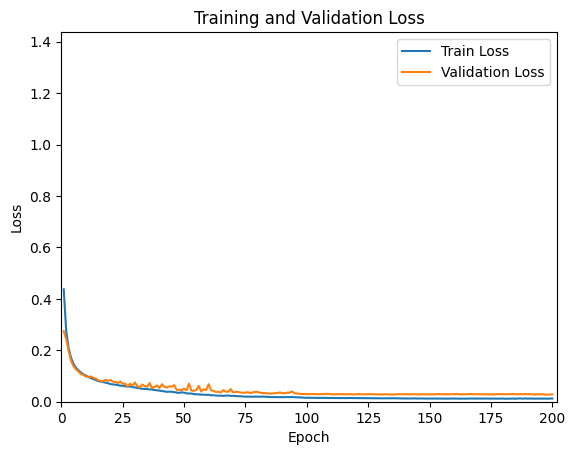

epoch:   0%|          | 1/200 [00:12<42:34, 12.84s/it]

Epoch 0: train_loss 0.437178609467516, train_iou 0.01404205709695816,  val_loss 0.27381884058316547, val_iou 0.0032692900858819485
, lr [0.0001]


epoch:   1%|          | 2/200 [00:23<38:21, 11.62s/it]

epoch:   2%|▏         | 3/200 [00:34<36:44, 11.19s/it]

Epoch 2: train_loss 0.2080285390820166, train_iou 0.0004480610368773341,  val_loss 0.19729527190167417, val_iou 0.00013235221558716148
, lr [0.0001]


epoch:   2%|▏         | 4/200 [00:45<36:15, 11.10s/it]

Epoch 3: train_loss 0.17009003817633747, train_iou 0.00011721403279807419,  val_loss 0.1582657696418865, val_iou 8.08207769296132e-05
, lr [0.0001]


epoch:   2%|▎         | 5/200 [00:55<35:09, 10.82s/it]

Epoch 4: train_loss 0.14731782529289875, train_iou 7.829438254702836e-05,  val_loss 0.13838245775750888, val_iou 1.3785315786662977e-05
, lr [0.0001]


epoch:   3%|▎         | 6/200 [01:05<34:23, 10.64s/it]

Epoch 5: train_loss 0.13221812821197187, train_iou 4.724130849353969e-05,  val_loss 0.1259967784888001, val_iou 1.5894966054474935e-05
, lr [0.0001]


epoch:   4%|▎         | 7/200 [01:16<34:11, 10.63s/it]

Epoch 6: train_loss 0.12163249943091813, train_iou 1.861683267634362e-05,  val_loss 0.11745974133091588, val_iou 0.0
, lr [0.0001]


epoch:   4%|▍         | 8/200 [01:26<33:47, 10.56s/it]

Epoch 7: train_loss 0.11348836842410091, train_iou 1.0432222552481107e-05,  val_loss 0.10750187612989898, val_iou 0.0
, lr [0.0001]


epoch:   4%|▍         | 9/200 [01:37<33:29, 10.52s/it]

Epoch 8: train_loss 0.1068048943825041, train_iou 1.0708608897402883e-06,  val_loss 0.10409579073549599, val_iou 0.0
, lr [0.0001]


epoch:   5%|▌         | 10/200 [01:47<33:06, 10.45s/it]

Epoch 9: train_loss 0.10217589319555045, train_iou 1.6017787629607483e-06,  val_loss 0.09800107032060623, val_iou 0.0
, lr [0.0001]


epoch:   6%|▌         | 11/200 [01:57<32:47, 10.41s/it]

Epoch 10: train_loss 0.0964646929141247, train_iou 0.0025919387117028236,  val_loss 0.09574503499654032, val_iou 0.0007631223415955901
, lr [0.0001]


epoch:   6%|▌         | 12/200 [02:08<32:39, 10.42s/it]

Epoch 11: train_loss 0.0917702580742563, train_iou 0.01846270263195038,  val_loss 0.09814563569843128, val_iou 0.0
, lr [0.0001]


epoch:   6%|▋         | 13/200 [02:18<32:35, 10.46s/it]

Epoch 12: train_loss 0.08823854248431395, train_iou 0.043598420917987823,  val_loss 0.09346407699969507, val_iou 0.00015730690211057663
, lr [0.0001]


epoch:   7%|▋         | 14/200 [02:29<32:18, 10.42s/it]

Epoch 13: train_loss 0.08422132494674388, train_iou 0.08580254018306732,  val_loss 0.08954326335781364, val_iou 0.011079343967139721
, lr [0.0001]


epoch:   8%|▊         | 15/200 [02:39<32:00, 10.38s/it]

Epoch 14: train_loss 0.0804711991588676, train_iou 0.13990646600723267,  val_loss 0.08403066297372182, val_iou 0.015095281414687634
, lr [0.0001]


epoch:   8%|▊         | 16/200 [02:49<31:45, 10.35s/it]

Epoch 15: train_loss 0.07829163637426165, train_iou 0.14854764938354492,  val_loss 0.08131973845984346, val_iou 0.039064548909664154
, lr [0.0001]


epoch:   8%|▊         | 17/200 [03:00<31:31, 10.34s/it]

Epoch 16: train_loss 0.07609825536157146, train_iou 0.16747790575027466,  val_loss 0.07895056783191619, val_iou 0.047828253358602524
, lr [0.0001]


epoch:   9%|▉         | 18/200 [03:10<31:21, 10.34s/it]

Epoch 17: train_loss 0.07402931402628671, train_iou 0.16928605735301971,  val_loss 0.08514730800544063, val_iou 0.0
, lr [0.0001]


epoch:  10%|▉         | 19/200 [03:20<31:08, 10.32s/it]

Epoch 18: train_loss 0.07213598761695002, train_iou 0.17291337251663208,  val_loss 0.08143602652094697, val_iou 0.023981139063835144
, lr [0.0001]


epoch:  10%|█         | 20/200 [03:31<30:59, 10.33s/it]

Epoch 19: train_loss 0.0686484427313612, train_iou 0.19895176589488983,  val_loss 0.08464765260296483, val_iou 0.034642089158296585
, lr [0.0001]


epoch:  10%|█         | 21/200 [03:41<30:45, 10.31s/it]

Epoch 20: train_loss 0.06738194828784025, train_iou 0.19624446332454681,  val_loss 0.07796804034101065, val_iou 0.031523652374744415
, lr [0.0001]


epoch:  11%|█         | 22/200 [03:51<30:39, 10.34s/it]

Epoch 21: train_loss 0.06610967699024413, train_iou 0.21505507826805115,  val_loss 0.07711091885964076, val_iou 0.05442815274000168
, lr [0.0001]


epoch:  12%|█▏        | 23/200 [04:02<30:28, 10.33s/it]

Epoch 22: train_loss 0.06484304097064016, train_iou 0.20306742191314697,  val_loss 0.07239993849909433, val_iou 0.09878959506750107
, lr [0.0001]


epoch:  12%|█▏        | 24/200 [04:12<30:20, 10.34s/it]

Epoch 23: train_loss 0.06249486781681828, train_iou 0.22933629155158997,  val_loss 0.07850704049711586, val_iou 0.06127988547086716
, lr [0.0001]


epoch:  12%|█▎        | 25/200 [04:22<30:08, 10.34s/it]

Epoch 24: train_loss 0.0620059343224222, train_iou 0.2418845295906067,  val_loss 0.07013376970444957, val_iou 0.14627981185913086
, lr [0.0001]


epoch:  13%|█▎        | 26/200 [04:33<29:58, 10.33s/it]

Epoch 25: train_loss 0.06004851691750966, train_iou 0.25000640749931335,  val_loss 0.07055292747193767, val_iou 0.13555288314819336
, lr [0.0001]


epoch:  14%|█▎        | 27/200 [04:43<29:50, 10.35s/it]

Epoch 26: train_loss 0.058768421155635756, train_iou 0.26660847663879395,  val_loss 0.059338044815806935, val_iou 0.23847821354866028
, lr [0.0001]


epoch:  14%|█▍        | 28/200 [04:54<30:05, 10.49s/it]

Epoch 27: train_loss 0.05915537753992209, train_iou 0.25707271695137024,  val_loss 0.07016358356322011, val_iou 0.1121029257774353
, lr [0.0001]


epoch:  14%|█▍        | 29/200 [05:04<29:42, 10.42s/it]

Epoch 28: train_loss 0.05691183208164944, train_iou 0.27128174901008606,  val_loss 0.06243556517586913, val_iou 0.2401197999715805
, lr [0.0001]


epoch:  15%|█▌        | 30/200 [05:15<29:33, 10.43s/it]

Epoch 29: train_loss 0.055416181718660924, train_iou 0.2805624008178711,  val_loss 0.07481075138334305, val_iou 0.08574660867452621
, lr [0.0001]


epoch:  16%|█▌        | 31/200 [05:25<29:18, 10.40s/it]

Epoch 30: train_loss 0.05379807937275681, train_iou 0.29185616970062256,  val_loss 0.06073658456725459, val_iou 0.22724094986915588
, lr [0.0001]


epoch:  16%|█▌        | 32/200 [05:35<29:01, 10.37s/it]

Epoch 31: train_loss 0.05204301655342683, train_iou 0.3210063576698303,  val_loss 0.055912024551822294, val_iou 0.21054640412330627
, lr [0.0001]


epoch:  16%|█▋        | 33/200 [05:45<28:47, 10.34s/it]

Epoch 32: train_loss 0.05023498178431482, train_iou 0.3265610337257385,  val_loss 0.06694460091411426, val_iou 0.10488766431808472
, lr [0.0001]


epoch:  17%|█▋        | 34/200 [05:56<28:35, 10.34s/it]

Epoch 33: train_loss 0.04992144397061682, train_iou 0.3288789391517639,  val_loss 0.0602432488193435, val_iou 0.20356759428977966
, lr [0.0001]


epoch:  18%|█▊        | 35/200 [06:06<28:25, 10.34s/it]

Epoch 34: train_loss 0.04917434176009913, train_iou 0.3270357549190521,  val_loss 0.05897031472094597, val_iou 0.2296385020017624
, lr [0.0001]


epoch:  18%|█▊        | 36/200 [06:17<28:21, 10.37s/it]

Epoch 35: train_loss 0.048482275335274966, train_iou 0.343240350484848,  val_loss 0.07223031709912003, val_iou 0.04399026930332184
, lr [0.0001]


epoch:  18%|█▊        | 37/200 [06:27<28:15, 10.40s/it]

Epoch 36: train_loss 0.04728621659355131, train_iou 0.3376310467720032,  val_loss 0.052886868196149024, val_iou 0.2672063112258911
, lr [0.0001]


epoch:  19%|█▉        | 38/200 [06:37<28:01, 10.38s/it]

Epoch 37: train_loss 0.045081506704641915, train_iou 0.3770415186882019,  val_loss 0.05745775500933329, val_iou 0.20693275332450867
, lr [0.0001]


epoch:  20%|█▉        | 39/200 [06:48<28:03, 10.46s/it]

Epoch 38: train_loss 0.044500462306970696, train_iou 0.3802151083946228,  val_loss 0.06317478622640332, val_iou 0.21287810802459717
, lr [0.0001]


epoch:  20%|██        | 40/200 [06:59<27:59, 10.50s/it]

Epoch 39: train_loss 0.04289672487111204, train_iou 0.3998664319515228,  val_loss 0.0531535115373391, val_iou 0.28225570917129517
, lr [0.0001]


epoch:  20%|██        | 41/200 [07:09<27:43, 10.46s/it]

Epoch 40: train_loss 0.04164690996711503, train_iou 0.41853389143943787,  val_loss 0.06798252066777598, val_iou 0.10422362387180328
, lr [0.0001]


epoch:  21%|██        | 42/200 [07:19<27:28, 10.43s/it]

Epoch 41: train_loss 0.0402585792521435, train_iou 0.4297775626182556,  val_loss 0.05800362011437775, val_iou 0.23509865999221802
, lr [0.0001]


epoch:  22%|██▏       | 43/200 [07:30<27:15, 10.42s/it]

Epoch 42: train_loss 0.03838532574299209, train_iou 0.4577229619026184,  val_loss 0.054918384600070216, val_iou 0.2696582078933716
, lr [0.0001]


epoch:  22%|██▏       | 44/200 [07:40<27:02, 10.40s/it]

Epoch 43: train_loss 0.03925217480872215, train_iou 0.4444243907928467,  val_loss 0.06019622367876832, val_iou 0.1526673138141632
, lr [0.0001]


epoch:  22%|██▎       | 45/200 [07:50<26:50, 10.39s/it]

Epoch 44: train_loss 0.03848661405570579, train_iou 0.4517871141433716,  val_loss 0.05839394401478511, val_iou 0.23989209532737732
, lr [0.0001]


epoch:  23%|██▎       | 46/200 [08:01<26:40, 10.39s/it]

Epoch 45: train_loss 0.03727460809252679, train_iou 0.46308669447898865,  val_loss 0.06472154097851887, val_iou 0.13159415125846863
, lr [0.0001]


epoch:  24%|██▎       | 47/200 [08:11<26:30, 10.40s/it]

Epoch 46: train_loss 0.035467245359513094, train_iou 0.49812906980514526,  val_loss 0.04619573293033467, val_iou 0.3827548921108246
, lr [0.0001]


epoch:  24%|██▍       | 48/200 [08:22<26:19, 10.39s/it]

Epoch 47: train_loss 0.03400143409517879, train_iou 0.5128530263900757,  val_loss 0.04534329111457512, val_iou 0.3884095847606659
, lr [0.0001]


epoch:  24%|██▍       | 49/200 [08:32<26:04, 10.36s/it]

Epoch 48: train_loss 0.03661705027726363, train_iou 0.47333085536956787,  val_loss 0.044741034988434084, val_iou 0.3760144114494324
, lr [0.0001]


epoch:  25%|██▌       | 50/200 [08:42<25:51, 10.34s/it]

Epoch 49: train_loss 0.035292822759761554, train_iou 0.47840115427970886,  val_loss 0.05095915620525678, val_iou 0.3393112123012543
, lr [0.0001]


epoch:  26%|██▌       | 51/200 [08:53<25:39, 10.33s/it]

Epoch 50: train_loss 0.03261412819627961, train_iou 0.51349276304245,  val_loss 0.04444279719985301, val_iou 0.3764652609825134
, lr [0.0001]


epoch:  26%|██▌       | 52/200 [09:03<25:28, 10.33s/it]

Epoch 51: train_loss 0.03202947694494668, train_iou 0.5304770469665527,  val_loss 0.07023974311768368, val_iou 0.10924160480499268
, lr [0.0001]


epoch:  26%|██▋       | 53/200 [09:13<25:19, 10.33s/it]

Epoch 52: train_loss 0.0316635184052717, train_iou 0.5394297242164612,  val_loss 0.04335775554821055, val_iou 0.3893826901912689
, lr [0.0001]


epoch:  27%|██▋       | 54/200 [09:24<25:08, 10.33s/it]

Epoch 53: train_loss 0.029686154869168695, train_iou 0.5626301765441895,  val_loss 0.04256539627589205, val_iou 0.4407297968864441
, lr [0.0001]


epoch:  28%|██▊       | 55/200 [09:34<24:57, 10.33s/it]

Epoch 54: train_loss 0.028872614816734286, train_iou 0.572239875793457,  val_loss 0.045399481711047955, val_iou 0.3776211142539978
, lr [0.0001]


epoch:  28%|██▊       | 56/200 [09:44<24:46, 10.32s/it]

Epoch 55: train_loss 0.02858779940327711, train_iou 0.5882401466369629,  val_loss 0.061549381663401924, val_iou 0.23016735911369324
, lr [0.0001]


epoch:  28%|██▊       | 57/200 [09:54<24:36, 10.33s/it]

Epoch 56: train_loss 0.02735332463325475, train_iou 0.5999234914779663,  val_loss 0.03972673802686635, val_iou 0.45564350485801697
, lr [0.0001]


epoch:  29%|██▉       | 58/200 [10:05<24:27, 10.33s/it]

Epoch 57: train_loss 0.02766508362961538, train_iou 0.5953682661056519,  val_loss 0.04872840112175352, val_iou 0.3441288471221924
, lr [0.0001]


epoch:  30%|██▉       | 59/200 [10:15<24:24, 10.38s/it]

Epoch 58: train_loss 0.026467904616586286, train_iou 0.6009582281112671,  val_loss 0.04510981235052309, val_iou 0.362174928188324
, lr [0.0001]


epoch:  30%|███       | 60/200 [10:26<24:07, 10.34s/it]

Epoch 59: train_loss 0.027317032260625852, train_iou 0.6010860204696655,  val_loss 0.06821893291768208, val_iou 0.1473097801208496
, lr [0.0001]


epoch:  30%|███       | 61/200 [10:36<24:10, 10.44s/it]

Epoch 60: train_loss 0.024869273251756675, train_iou 0.6389167308807373,  val_loss 0.045139346652293716, val_iou 0.3883025646209717
, lr [0.0001]


epoch:  31%|███       | 62/200 [10:47<24:13, 10.53s/it]

Epoch 61: train_loss 0.02524115699484493, train_iou 0.625799298286438,  val_loss 0.04175352573555003, val_iou 0.4150815010070801
, lr [0.0001]


epoch:  32%|███▏      | 63/200 [10:58<24:06, 10.56s/it]

Epoch 62: train_loss 0.024000572122206992, train_iou 0.6460361480712891,  val_loss 0.03822957784418137, val_iou 0.4844738245010376
, lr [0.0001]


epoch:  32%|███▏      | 64/200 [11:08<23:52, 10.53s/it]

Epoch 63: train_loss 0.02359457637939088, train_iou 0.6574302911758423,  val_loss 0.03849517397822872, val_iou 0.47103166580200195
, lr [0.0001]


epoch:  32%|███▎      | 65/200 [11:19<23:49, 10.59s/it]

Epoch 64: train_loss 0.02345311767876349, train_iou 0.6517789363861084,  val_loss 0.03609559731057254, val_iou 0.5090380907058716
, lr [0.0001]


epoch:  33%|███▎      | 66/200 [11:29<23:42, 10.61s/it]

Epoch 65: train_loss 0.02288008912243827, train_iou 0.6590725183486938,  val_loss 0.04513435586485812, val_iou 0.38857829570770264
, lr [0.0001]


epoch:  34%|███▎      | 67/200 [11:40<23:32, 10.62s/it]

Epoch 66: train_loss 0.023816122365519655, train_iou 0.6361318230628967,  val_loss 0.03918269416818055, val_iou 0.4539893567562103
, lr [0.0001]


epoch:  34%|███▍      | 68/200 [11:51<23:32, 10.70s/it]

Epoch 67: train_loss 0.02400874660447591, train_iou 0.6345734596252441,  val_loss 0.038937007968303974, val_iou 0.4713252782821655
, lr [0.0001]


epoch:  34%|███▍      | 69/200 [12:01<23:10, 10.62s/it]

Epoch 68: train_loss 0.022731017706420286, train_iou 0.6617628335952759,  val_loss 0.049271792313584716, val_iou 0.3583911061286926
, lr [0.0001]


epoch:  35%|███▌      | 70/200 [12:12<22:52, 10.56s/it]

Epoch 69: train_loss 0.022468619984308075, train_iou 0.6592882871627808,  val_loss 0.03620490313617773, val_iou 0.49300894141197205
, lr [0.0001]


epoch:  36%|███▌      | 71/200 [12:22<22:33, 10.49s/it]

Epoch 70: train_loss 0.02239108450384654, train_iou 0.6638245582580566,  val_loss 0.037756164508160724, val_iou 0.49286049604415894
, lr [0.0001]


epoch:  36%|███▌      | 72/200 [12:33<22:26, 10.52s/it]

Epoch 71: train_loss 0.021437918604273187, train_iou 0.6810985803604126,  val_loss 0.03776617816859676, val_iou 0.469503253698349
, lr [0.0001]


epoch:  36%|███▋      | 73/200 [12:43<22:20, 10.55s/it]

Epoch 72: train_loss 0.021276857229796324, train_iou 0.6719520092010498,  val_loss 0.03610097825206736, val_iou 0.5147969722747803
, lr [0.0001]


epoch:  37%|███▋      | 74/200 [12:54<22:17, 10.62s/it]

Epoch 73: train_loss 0.020158914489176137, train_iou 0.7017209529876709,  val_loss 0.034567845324354786, val_iou 0.5486332178115845
, lr [0.0001]


epoch:  38%|███▊      | 75/200 [13:05<22:17, 10.70s/it]

Epoch 74: train_loss 0.020133876365292756, train_iou 0.7073588371276855,  val_loss 0.035878481383445446, val_iou 0.5211983919143677
, lr [0.0001]


epoch:  38%|███▊      | 76/200 [13:16<22:33, 10.92s/it]

Epoch 75: train_loss 0.01955599955311327, train_iou 0.7111380100250244,  val_loss 0.0367990942491639, val_iou 0.5207629203796387
, lr [0.0001]


epoch:  38%|███▊      | 77/200 [13:28<22:39, 11.05s/it]

Epoch 76: train_loss 0.01948730156628371, train_iou 0.714599072933197,  val_loss 0.03379440225500573, val_iou 0.5655399560928345
, lr [0.0001]


epoch:  39%|███▉      | 78/200 [13:39<22:26, 11.04s/it]

Epoch 77: train_loss 0.01946401276221179, train_iou 0.7061288356781006,  val_loss 0.03607914753017887, val_iou 0.525802493095398
, lr [0.0001]


epoch:  40%|███▉      | 79/200 [13:50<22:18, 11.06s/it]

Epoch 78: train_loss 0.01975214581447418, train_iou 0.7090110778808594,  val_loss 0.038294299435551446, val_iou 0.4836049973964691
, lr [0.0001]


epoch:  40%|████      | 80/200 [14:01<22:02, 11.02s/it]

Epoch 79: train_loss 0.019909052422853433, train_iou 0.7055765986442566,  val_loss 0.037949866024396754, val_iou 0.47228166460990906
, lr [0.0001]


epoch:  40%|████      | 81/200 [14:12<21:51, 11.02s/it]

Epoch 80: train_loss 0.019407322042016468, train_iou 0.7084143161773682,  val_loss 0.03462026602718779, val_iou 0.5607446432113647
, lr [0.0001]


epoch:  41%|████      | 82/200 [14:23<21:34, 10.97s/it]

Epoch 81: train_loss 0.019853631343679998, train_iou 0.700914740562439,  val_loss 0.03398983182525763, val_iou 0.5361915826797485
, lr [0.0001]


epoch:  42%|████▏     | 83/200 [14:34<21:19, 10.94s/it]

Epoch 82: train_loss 0.019313197802463766, train_iou 0.7054528594017029,  val_loss 0.033267532385164694, val_iou 0.5558388233184814
, lr [0.0001]


epoch:  42%|████▏     | 84/200 [14:45<21:10, 10.95s/it]

Epoch 83: train_loss 0.01918853892621769, train_iou 0.7188653349876404,  val_loss 0.03245385976568345, val_iou 0.5627734065055847
, lr [0.0001]


epoch:  42%|████▎     | 85/200 [14:55<20:56, 10.93s/it]

Epoch 84: train_loss 0.018344121846536596, train_iou 0.7302635908126831,  val_loss 0.031512501639544326, val_iou 0.585392415523529
, lr [0.0001]


epoch:  43%|████▎     | 86/200 [15:07<20:53, 11.00s/it]

Epoch 85: train_loss 0.017879822800055095, train_iou 0.7304575443267822,  val_loss 0.031986829514304795, val_iou 0.5730454921722412
, lr [0.0001]


epoch:  44%|████▎     | 87/200 [15:18<20:39, 10.97s/it]

Epoch 86: train_loss 0.018277964192859653, train_iou 0.7292172312736511,  val_loss 0.0333041253509701, val_iou 0.5601478815078735
, lr [0.0001]


epoch:  44%|████▍     | 88/200 [15:28<20:27, 10.96s/it]

Epoch 87: train_loss 0.018003253065526286, train_iou 0.7325202822685242,  val_loss 0.03390786364193885, val_iou 0.5454609990119934
, lr [0.0001]


epoch:  44%|████▍     | 89/200 [15:40<20:43, 11.20s/it]

Epoch 88: train_loss 0.01749024217202005, train_iou 0.7335493564605713,  val_loss 0.03603613034131065, val_iou 0.5279579162597656
, lr [0.0001]


epoch:  45%|████▌     | 90/200 [15:52<20:36, 11.24s/it]

Epoch 89: train_loss 0.01802081253743332, train_iou 0.7327656745910645,  val_loss 0.033430961090871084, val_iou 0.5676664113998413
, lr [0.0001]


epoch:  46%|████▌     | 91/200 [16:03<20:26, 11.26s/it]

Epoch 90: train_loss 0.017636908879911258, train_iou 0.7355877757072449,  val_loss 0.032973609804626436, val_iou 0.5596681833267212
, lr [0.0001]


epoch:  46%|████▌     | 92/200 [16:14<20:18, 11.28s/it]

Epoch 91: train_loss 0.018495610947736385, train_iou 0.7311162352561951,  val_loss 0.03512137563478562, val_iou 0.5344765186309814
, lr [0.0001]


epoch:  46%|████▋     | 93/200 [16:25<20:00, 11.22s/it]

Epoch 92: train_loss 0.0178555221268625, train_iou 0.7114423513412476,  val_loss 0.03563255380078029, val_iou 0.5373892784118652
, lr [0.0001]


epoch:  47%|████▋     | 94/200 [16:36<19:49, 11.22s/it]

Epoch 93: train_loss 0.01841063820553147, train_iou 0.722252368927002,  val_loss 0.03971989701191584, val_iou 0.46394580602645874
, lr [0.0001]


epoch:  48%|████▊     | 95/200 [16:48<19:46, 11.30s/it]

Epoch 94: train_loss 0.01765123016517672, train_iou 0.7400225400924683,  val_loss 0.03301600865539043, val_iou 0.5660566687583923
, lr [0.0001]


epoch:  48%|████▊     | 96/200 [16:59<19:34, 11.29s/it]

Epoch 95: train_loss 0.017016445487888172, train_iou 0.7312817573547363,  val_loss 0.032123991118002966, val_iou 0.5927535891532898
, lr [1e-05]


epoch:  48%|████▊     | 97/200 [17:11<19:22, 11.28s/it]

Epoch 96: train_loss 0.016959074124543352, train_iou 0.753168523311615,  val_loss 0.031455554248344515, val_iou 0.6121272444725037
, lr [1e-05]


epoch:  49%|████▉     | 98/200 [17:22<19:19, 11.36s/it]

Epoch 97: train_loss 0.01634284956161221, train_iou 0.7559331655502319,  val_loss 0.030065603834647004, val_iou 0.621734082698822
, lr [1e-05]


epoch:  50%|████▉     | 99/200 [17:33<19:03, 11.33s/it]

Epoch 98: train_loss 0.015562998085135362, train_iou 0.7796671390533447,  val_loss 0.030181543280680973, val_iou 0.6274977922439575
, lr [1e-05]


epoch:  50%|█████     | 100/200 [17:45<18:53, 11.33s/it]

Epoch 99: train_loss 0.015544972729928766, train_iou 0.7819368839263916,  val_loss 0.029476324857402873, val_iou 0.6253821849822998
, lr [1e-05]


epoch:  50%|█████     | 101/200 [17:56<18:38, 11.29s/it]

Epoch 100: train_loss 0.015391528060791469, train_iou 0.7841587066650391,  val_loss 0.029624919276884806, val_iou 0.632628321647644
, lr [1e-05]


epoch:  51%|█████     | 102/200 [18:07<18:30, 11.33s/it]

Epoch 101: train_loss 0.015161173027447778, train_iou 0.7826638221740723,  val_loss 0.029428009965246724, val_iou 0.6262013912200928
, lr [1e-05]


epoch:  52%|█████▏    | 103/200 [18:19<18:16, 11.30s/it]

Epoch 102: train_loss 0.014937828246642042, train_iou 0.7880329489707947,  val_loss 0.029939012461772527, val_iou 0.634307861328125
, lr [1e-05]


epoch:  52%|█████▏    | 104/200 [18:30<18:02, 11.27s/it]

Epoch 103: train_loss 0.014903468192752563, train_iou 0.7908779382705688,  val_loss 0.02896091023520116, val_iou 0.6437134742736816
, lr [1e-05]


epoch:  52%|█████▎    | 105/200 [18:41<17:51, 11.28s/it]

Epoch 104: train_loss 0.015023229076128818, train_iou 0.7932251691818237,  val_loss 0.029512538284223566, val_iou 0.6320066452026367
, lr [1e-05]


epoch:  53%|█████▎    | 106/200 [18:52<17:39, 11.27s/it]

Epoch 105: train_loss 0.015042851322176882, train_iou 0.7819165587425232,  val_loss 0.029962208081958114, val_iou 0.6401916742324829
, lr [1e-05]


epoch:  54%|█████▎    | 107/200 [19:04<17:29, 11.28s/it]

Epoch 106: train_loss 0.014998353923975118, train_iou 0.798009991645813,  val_loss 0.029676508238559128, val_iou 0.6361727118492126
, lr [1e-05]


epoch:  54%|█████▍    | 108/200 [19:15<17:21, 11.32s/it]

Epoch 107: train_loss 0.014547639144490464, train_iou 0.7892208099365234,  val_loss 0.030587433586998652, val_iou 0.6355757713317871
, lr [1e-05]


epoch:  55%|█████▍    | 109/200 [19:26<17:09, 11.31s/it]

Epoch 108: train_loss 0.014643364145047336, train_iou 0.7958530783653259,  val_loss 0.030251407535165867, val_iou 0.6329174041748047
, lr [1e-05]


epoch:  55%|█████▌    | 110/200 [19:37<16:52, 11.25s/it]

Epoch 109: train_loss 0.014610305390875749, train_iou 0.7983533143997192,  val_loss 0.02935520880004411, val_iou 0.6431402564048767
, lr [1e-05]


epoch:  56%|█████▌    | 111/200 [19:48<16:35, 11.19s/it]

Epoch 110: train_loss 0.014451221670165207, train_iou 0.7997688055038452,  val_loss 0.02836618410243142, val_iou 0.6477863788604736
, lr [1e-05]


epoch:  56%|█████▌    | 112/200 [20:00<16:22, 11.17s/it]

Epoch 111: train_loss 0.014310951165930189, train_iou 0.7810165882110596,  val_loss 0.029302412243459815, val_iou 0.6450202465057373
, lr [1e-05]


epoch:  56%|█████▋    | 113/200 [20:11<16:09, 11.15s/it]

Epoch 112: train_loss 0.014346141407661366, train_iou 0.7990570068359375,  val_loss 0.029379984343885092, val_iou 0.6403526067733765
, lr [1e-05]


epoch:  57%|█████▋    | 114/200 [20:22<15:55, 11.11s/it]

Epoch 113: train_loss 0.014158324235642599, train_iou 0.8035440444946289,  val_loss 0.029525431443846995, val_iou 0.6528500318527222
, lr [1e-05]


epoch:  57%|█████▊    | 115/200 [20:33<15:41, 11.07s/it]

Epoch 114: train_loss 0.014059918306090616, train_iou 0.8047470450401306,  val_loss 0.028910684088865917, val_iou 0.6448564529418945
, lr [1e-05]


epoch:  58%|█████▊    | 116/200 [20:44<15:29, 11.06s/it]

Epoch 115: train_loss 0.01408126374223718, train_iou 0.8087109327316284,  val_loss 0.029157254684676406, val_iou 0.6452071666717529
, lr [1e-05]


epoch:  58%|█████▊    | 117/200 [20:55<15:17, 11.06s/it]

Epoch 116: train_loss 0.014434143757880337, train_iou 0.7937355041503906,  val_loss 0.02967859726519354, val_iou 0.6485881805419922
, lr [1e-05]


epoch:  59%|█████▉    | 118/200 [21:06<15:11, 11.11s/it]

Epoch 117: train_loss 0.014332728986926252, train_iou 0.8006975650787354,  val_loss 0.02929891663933954, val_iou 0.6535855531692505
, lr [1e-05]


epoch:  60%|█████▉    | 119/200 [21:17<14:57, 11.08s/it]

Epoch 118: train_loss 0.01391775542211653, train_iou 0.8036009669303894,  val_loss 0.02828982862974367, val_iou 0.6564292311668396
, lr [1e-05]


epoch:  60%|██████    | 120/200 [21:28<14:46, 11.09s/it]

Epoch 119: train_loss 0.014027309651025619, train_iou 0.8046190738677979,  val_loss 0.028800669757108533, val_iou 0.6530628204345703
, lr [1e-05]


epoch:  60%|██████    | 121/200 [21:39<14:36, 11.09s/it]

Epoch 120: train_loss 0.013747357286086387, train_iou 0.8078535795211792,  val_loss 0.029964949775447128, val_iou 0.6485301852226257
, lr [1e-05]


epoch:  61%|██████    | 122/200 [21:50<14:23, 11.07s/it]

Epoch 121: train_loss 0.014047381045415948, train_iou 0.8080994486808777,  val_loss 0.02950159967025762, val_iou 0.6485269665718079
, lr [1e-05]


epoch:  62%|██████▏   | 123/200 [22:01<14:11, 11.06s/it]

Epoch 122: train_loss 0.01382986111974074, train_iou 0.7982816100120544,  val_loss 0.028470792457140903, val_iou 0.6516723036766052
, lr [1e-05]


epoch:  62%|██████▏   | 124/200 [22:12<14:02, 11.09s/it]

Epoch 123: train_loss 0.014150691216792723, train_iou 0.7909009456634521,  val_loss 0.029320247831844514, val_iou 0.6458818912506104
, lr [1e-05]


epoch:  62%|██████▎   | 125/200 [22:24<13:53, 11.11s/it]

Epoch 124: train_loss 0.013890590957720272, train_iou 0.8041185736656189,  val_loss 0.02920706203627971, val_iou 0.6495359539985657
, lr [1e-05]


epoch:  63%|██████▎   | 126/200 [22:35<13:46, 11.17s/it]

Epoch 125: train_loss 0.013675726425868494, train_iou 0.8077936172485352,  val_loss 0.029405259677479343, val_iou 0.6516273617744446
, lr [1e-05]


epoch:  64%|██████▎   | 127/200 [22:46<13:35, 11.18s/it]

Epoch 126: train_loss 0.013570817691032534, train_iou 0.8080606460571289,  val_loss 0.02942061488346387, val_iou 0.6481112241744995
, lr [1e-05]


epoch:  64%|██████▍   | 128/200 [22:57<13:27, 11.22s/it]

Epoch 127: train_loss 0.013488293588725907, train_iou 0.8150694370269775,  val_loss 0.028733856144851896, val_iou 0.6461178064346313
, lr [1e-05]


epoch:  64%|██████▍   | 129/200 [23:09<13:20, 11.28s/it]

Epoch 128: train_loss 0.013121176493488979, train_iou 0.8132938146591187,  val_loss 0.02853808125420924, val_iou 0.6535443067550659
, lr [1e-05]


epoch:  65%|██████▌   | 130/200 [23:20<13:04, 11.21s/it]

Epoch 129: train_loss 0.013284804801196362, train_iou 0.8150107264518738,  val_loss 0.028138208733771437, val_iou 0.6536070108413696
, lr [1e-05]


epoch:  66%|██████▌   | 131/200 [23:31<12:47, 11.12s/it]

Epoch 130: train_loss 0.013220834205246935, train_iou 0.8100234866142273,  val_loss 0.028078174659161157, val_iou 0.6571203470230103
, lr [1e-05]


epoch:  66%|██████▌   | 132/200 [23:42<12:36, 11.13s/it]

Epoch 131: train_loss 0.01334868315168302, train_iou 0.8155759572982788,  val_loss 0.02920005921154253, val_iou 0.6545437574386597
, lr [1e-05]


epoch:  66%|██████▋   | 133/200 [23:53<12:24, 11.12s/it]

Epoch 132: train_loss 0.013214502748892163, train_iou 0.8166908025741577,  val_loss 0.02877872296038174, val_iou 0.6546822786331177
, lr [1e-05]


epoch:  67%|██████▋   | 134/200 [24:04<12:17, 11.17s/it]

Epoch 133: train_loss 0.013368104785831288, train_iou 0.8153862953186035,  val_loss 0.028280921450625825, val_iou 0.6555571556091309
, lr [1e-05]


epoch:  68%|██████▊   | 135/200 [24:16<12:08, 11.20s/it]

Epoch 134: train_loss 0.01346963297337394, train_iou 0.8087526559829712,  val_loss 0.027759492046810608, val_iou 0.6530022621154785
, lr [1e-05]


epoch:  68%|██████▊   | 136/200 [24:27<12:00, 11.27s/it]

Epoch 135: train_loss 0.013468939098545197, train_iou 0.8125060796737671,  val_loss 0.02821145607258684, val_iou 0.6562168598175049
, lr [1e-05]


epoch:  68%|██████▊   | 137/200 [24:38<11:48, 11.24s/it]

Epoch 136: train_loss 0.013109953676409995, train_iou 0.807563066482544,  val_loss 0.02992402564894448, val_iou 0.6500316858291626
, lr [1e-05]


epoch:  69%|██████▉   | 138/200 [24:49<11:35, 11.22s/it]

Epoch 137: train_loss 0.012650518431657492, train_iou 0.8179161548614502,  val_loss 0.02920218699321311, val_iou 0.6562779545783997
, lr [1e-05]


epoch:  70%|██████▉   | 139/200 [25:01<11:28, 11.29s/it]

Epoch 138: train_loss 0.01268944174665895, train_iou 0.8169187903404236,  val_loss 0.028603684257275316, val_iou 0.6526129245758057
, lr [1e-05]


epoch:  70%|███████   | 140/200 [25:12<11:16, 11.28s/it]

Epoch 139: train_loss 0.012924562468309494, train_iou 0.8234116435050964,  val_loss 0.029343268783983363, val_iou 0.6548366546630859
, lr [1e-05]


epoch:  70%|███████   | 141/200 [25:23<11:00, 11.20s/it]

Epoch 140: train_loss 0.012448152520941565, train_iou 0.8202918767929077,  val_loss 0.02918048903986972, val_iou 0.6514455080032349
, lr [1e-05]


epoch:  71%|███████   | 142/200 [25:34<10:45, 11.13s/it]

Epoch 141: train_loss 0.012834305240951404, train_iou 0.8044061064720154,  val_loss 0.028711645633623165, val_iou 0.6614668369293213
, lr [1e-05]


epoch:  72%|███████▏  | 143/200 [25:45<10:28, 11.03s/it]

Epoch 142: train_loss 0.012598838852812546, train_iou 0.8211705684661865,  val_loss 0.028579093816299594, val_iou 0.6559671759605408
, lr [1e-05]


epoch:  72%|███████▏  | 144/200 [25:56<10:17, 11.03s/it]

Epoch 143: train_loss 0.01301260737683436, train_iou 0.8057602643966675,  val_loss 0.029405619408334454, val_iou 0.6482447385787964
, lr [1e-05]


epoch:  72%|███████▎  | 145/200 [26:08<10:18, 11.24s/it]

Epoch 144: train_loss 0.012368782397409782, train_iou 0.8234174251556396,  val_loss 0.028409401355411416, val_iou 0.6553250551223755
, lr [1e-05]


epoch:  73%|███████▎  | 146/200 [26:19<10:08, 11.26s/it]

Epoch 145: train_loss 0.012696593075438783, train_iou 0.8149198889732361,  val_loss 0.028121480387785742, val_iou 0.6584776639938354
, lr [1.0000000000000002e-06]


epoch:  74%|███████▎  | 147/200 [26:30<10:00, 11.33s/it]

Epoch 146: train_loss 0.012656049119302319, train_iou 0.8110148310661316,  val_loss 0.029172213487727666, val_iou 0.6578183174133301
, lr [1.0000000000000002e-06]


epoch:  74%|███████▍  | 148/200 [26:42<09:53, 11.41s/it]

Epoch 147: train_loss 0.012290076975419064, train_iou 0.8056412935256958,  val_loss 0.028947715437219988, val_iou 0.6619664430618286
, lr [1.0000000000000002e-06]


epoch:  74%|███████▍  | 149/200 [26:54<09:43, 11.45s/it]

Epoch 148: train_loss 0.012414981446131713, train_iou 0.8233077526092529,  val_loss 0.02835894686480363, val_iou 0.6604968905448914
, lr [1.0000000000000002e-06]


epoch:  75%|███████▌  | 150/200 [27:05<09:26, 11.34s/it]

Epoch 149: train_loss 0.012669519014556199, train_iou 0.8199642896652222,  val_loss 0.028419530820301783, val_iou 0.6574641466140747
, lr [1.0000000000000002e-06]


epoch:  76%|███████▌  | 151/200 [27:16<09:11, 11.25s/it]

Epoch 150: train_loss 0.012449473550900666, train_iou 0.8012685179710388,  val_loss 0.02895172243757594, val_iou 0.6507636308670044
, lr [1.0000000000000002e-06]


epoch:  76%|███████▌  | 152/200 [27:27<09:06, 11.39s/it]

Epoch 151: train_loss 0.012454917162079804, train_iou 0.822820782661438,  val_loss 0.028527144362689348, val_iou 0.667852520942688
, lr [1.0000000000000002e-06]


epoch:  76%|███████▋  | 153/200 [27:39<08:52, 11.33s/it]

Epoch 152: train_loss 0.012088020300172796, train_iou 0.8280009627342224,  val_loss 0.029533982377058718, val_iou 0.6556561589241028
, lr [1.0000000000000002e-06]


epoch:  77%|███████▋  | 154/200 [27:50<08:37, 11.25s/it]

Epoch 153: train_loss 0.012290104075024526, train_iou 0.8255735635757446,  val_loss 0.02961288151201061, val_iou 0.6563515067100525
, lr [1.0000000000000002e-06]


epoch:  78%|███████▊  | 155/200 [28:01<08:22, 11.16s/it]

Epoch 154: train_loss 0.012043094866115737, train_iou 0.8239196538925171,  val_loss 0.028860029754459216, val_iou 0.66311115026474
, lr [1.0000000000000002e-06]


epoch:  78%|███████▊  | 156/200 [28:12<08:08, 11.10s/it]

Epoch 155: train_loss 0.012036049875245753, train_iou 0.8211544752120972,  val_loss 0.029451282254310065, val_iou 0.6518367528915405
, lr [1.0000000000000002e-06]


epoch:  78%|███████▊  | 157/200 [28:23<07:56, 11.08s/it]

Epoch 156: train_loss 0.011895957666916477, train_iou 0.8229458332061768,  val_loss 0.028969132291373385, val_iou 0.6523415446281433
, lr [1.0000000000000002e-07]


epoch:  79%|███████▉  | 158/200 [28:34<07:45, 11.09s/it]

Epoch 157: train_loss 0.012314974743973226, train_iou 0.8250596523284912,  val_loss 0.028690208450600666, val_iou 0.6583507657051086
, lr [1.0000000000000002e-07]


epoch:  80%|███████▉  | 159/200 [28:45<07:34, 11.08s/it]

Epoch 158: train_loss 0.01240187099435514, train_iou 0.8258938789367676,  val_loss 0.0297394575631266, val_iou 0.6513245701789856
, lr [1.0000000000000002e-07]


epoch:  80%|████████  | 160/200 [28:56<07:20, 11.02s/it]

Epoch 159: train_loss 0.012144406470673955, train_iou 0.8238739371299744,  val_loss 0.02901477617041398, val_iou 0.6594500541687012
, lr [1.0000000000000002e-07]


epoch:  80%|████████  | 161/200 [29:07<07:10, 11.04s/it]

Epoch 160: train_loss 0.012318056201568558, train_iou 0.8223074674606323,  val_loss 0.03034028404903027, val_iou 0.6492821574211121
, lr [1.0000000000000002e-07]


epoch:  81%|████████  | 162/200 [29:18<06:57, 10.99s/it]

Epoch 161: train_loss 0.011956451633813404, train_iou 0.8138842582702637,  val_loss 0.028660937242450252, val_iou 0.658490002155304
, lr [1.0000000000000002e-07]


epoch:  82%|████████▏ | 163/200 [29:28<06:45, 10.96s/it]

Epoch 162: train_loss 0.01213068153884776, train_iou 0.8265573978424072,  val_loss 0.028915288367418832, val_iou 0.6611678004264832
, lr [1.0000000000000002e-07]


epoch:  82%|████████▏ | 164/200 [29:39<06:35, 10.98s/it]

Epoch 163: train_loss 0.011965922820961938, train_iou 0.7915000319480896,  val_loss 0.02877360064616447, val_iou 0.6565089225769043
, lr [1.0000000000000002e-07]


epoch:  82%|████████▎ | 165/200 [29:50<06:22, 10.94s/it]

Epoch 164: train_loss 0.01191533635737318, train_iou 0.8263020515441895,  val_loss 0.02888642614006355, val_iou 0.6561087369918823
, lr [1.0000000000000002e-07]


epoch:  83%|████████▎ | 166/200 [30:01<06:13, 10.99s/it]

Epoch 165: train_loss 0.012385954833291597, train_iou 0.8134398460388184,  val_loss 0.029848155114919908, val_iou 0.655636191368103
, lr [1.0000000000000002e-07]


epoch:  84%|████████▎ | 167/200 [30:12<06:03, 11.00s/it]

Epoch 166: train_loss 0.012309741428253626, train_iou 0.8144311308860779,  val_loss 0.03004844320477337, val_iou 0.6527959108352661
, lr [1.0000000000000002e-07]


epoch:  84%|████████▍ | 168/200 [30:24<05:53, 11.04s/it]

Epoch 167: train_loss 0.012233900128289907, train_iou 0.8113657832145691,  val_loss 0.028671978311913628, val_iou 0.655263364315033
, lr [1.0000000000000004e-08]


epoch:  84%|████████▍ | 169/200 [30:35<05:43, 11.07s/it]

Epoch 168: train_loss 0.012368722488909257, train_iou 0.8281459808349609,  val_loss 0.029881543039234095, val_iou 0.6535264253616333
, lr [1.0000000000000004e-08]


epoch:  85%|████████▌ | 170/200 [30:46<05:30, 11.03s/it]

Epoch 169: train_loss 0.012273761217391451, train_iou 0.822396457195282,  val_loss 0.02847060670335126, val_iou 0.6599618196487427
, lr [1.0000000000000004e-08]


epoch:  86%|████████▌ | 171/200 [30:57<05:18, 10.97s/it]

Epoch 170: train_loss 0.012195614055551664, train_iou 0.8215709924697876,  val_loss 0.029391446671578832, val_iou 0.6546281576156616
, lr [1.0000000000000004e-08]


epoch:  86%|████████▌ | 172/200 [31:08<05:08, 11.01s/it]

Epoch 171: train_loss 0.012335568028016122, train_iou 0.8257595300674438,  val_loss 0.028512597114088073, val_iou 0.6608660221099854
, lr [1.0000000000000004e-08]


epoch:  86%|████████▋ | 173/200 [31:19<04:58, 11.06s/it]

Epoch 172: train_loss 0.012263043236100312, train_iou 0.8147498965263367,  val_loss 0.02906820621661922, val_iou 0.6614696979522705
, lr [1.0000000000000004e-08]


epoch:  87%|████████▋ | 174/200 [31:30<04:45, 10.99s/it]

Epoch 173: train_loss 0.012469193006956618, train_iou 0.8151000738143921,  val_loss 0.028397093396834147, val_iou 0.6547722816467285
, lr [1.0000000000000004e-08]


epoch:  88%|████████▊ | 175/200 [31:41<04:35, 11.01s/it]

Epoch 174: train_loss 0.011889859407462858, train_iou 0.8258799910545349,  val_loss 0.028912160395374222, val_iou 0.6565099954605103
, lr [1.0000000000000004e-08]


epoch:  88%|████████▊ | 176/200 [31:51<04:22, 10.95s/it]

Epoch 175: train_loss 0.012334679473530162, train_iou 0.8235582709312439,  val_loss 0.027931778471396173, val_iou 0.6566303968429565
, lr [1.0000000000000004e-08]


epoch:  88%|████████▊ | 177/200 [32:03<04:12, 10.98s/it]

Epoch 176: train_loss 0.011862177537246183, train_iou 0.8216599225997925,  val_loss 0.029233732230720982, val_iou 0.6590892672538757
, lr [1.0000000000000004e-08]


epoch:  89%|████████▉ | 178/200 [32:14<04:02, 11.04s/it]

Epoch 177: train_loss 0.011948443833826367, train_iou 0.8165241479873657,  val_loss 0.029888300465479974, val_iou 0.6590534448623657
, lr [1.0000000000000004e-08]


epoch:  90%|████████▉ | 179/200 [32:25<03:52, 11.06s/it]

Epoch 178: train_loss 0.012201317996790112, train_iou 0.8177387714385986,  val_loss 0.029251999221742153, val_iou 0.6546331644058228
, lr [1.0000000000000004e-08]


epoch:  90%|█████████ | 180/200 [32:36<03:40, 11.02s/it]

Epoch 179: train_loss 0.012169865997953448, train_iou 0.8195725679397583,  val_loss 0.02954950440995475, val_iou 0.6546564698219299
, lr [1.0000000000000004e-08]


epoch:  90%|█████████ | 181/200 [32:47<03:33, 11.22s/it]

Epoch 180: train_loss 0.011582667536105372, train_iou 0.8198146820068359,  val_loss 0.028957097400580684, val_iou 0.6559398174285889
, lr [1.0000000000000004e-08]


epoch:  91%|█████████ | 182/200 [32:59<03:23, 11.30s/it]

Epoch 181: train_loss 0.01189465703198103, train_iou 0.8214387893676758,  val_loss 0.029248358000830938, val_iou 0.6512653231620789
, lr [1.0000000000000004e-08]


epoch:  92%|█████████▏| 183/200 [33:10<03:13, 11.35s/it]

Epoch 182: train_loss 0.012204090938574136, train_iou 0.8198222517967224,  val_loss 0.029452819877894977, val_iou 0.649084210395813
, lr [1.0000000000000004e-08]


epoch:  92%|█████████▏| 184/200 [33:22<03:02, 11.41s/it]

Epoch 183: train_loss 0.012153490900566883, train_iou 0.8248533606529236,  val_loss 0.029930478642864893, val_iou 0.6545285582542419
, lr [1.0000000000000004e-08]


epoch:  92%|█████████▎| 185/200 [33:33<02:50, 11.35s/it]

Epoch 184: train_loss 0.011617310065148956, train_iou 0.8258481025695801,  val_loss 0.029559887935637786, val_iou 0.6568683385848999
, lr [1.0000000000000004e-08]


epoch:  93%|█████████▎| 186/200 [33:45<02:39, 11.38s/it]

Epoch 185: train_loss 0.012729596169132376, train_iou 0.814297080039978,  val_loss 0.028588571816041904, val_iou 0.6543148756027222
, lr [1.0000000000000004e-08]


epoch:  94%|█████████▎| 187/200 [33:56<02:27, 11.38s/it]

Epoch 186: train_loss 0.012649622695639679, train_iou 0.8255139589309692,  val_loss 0.02980165686258065, val_iou 0.6483871936798096
, lr [1.0000000000000004e-08]


epoch:  94%|█████████▍| 188/200 [34:08<02:17, 11.48s/it]

Epoch 187: train_loss 0.012091238935938988, train_iou 0.8258509039878845,  val_loss 0.028761385689659785, val_iou 0.6690545082092285
, lr [1.0000000000000004e-08]


epoch:  94%|█████████▍| 189/200 [34:20<02:07, 11.59s/it]

Epoch 188: train_loss 0.012578625381870904, train_iou 0.8180689215660095,  val_loss 0.030275703778350226, val_iou 0.6502630710601807
, lr [1.0000000000000004e-08]


epoch:  95%|█████████▌| 190/200 [34:31<01:55, 11.56s/it]

Epoch 189: train_loss 0.012219272718234897, train_iou 0.8202613592147827,  val_loss 0.02924273791973309, val_iou 0.6515602469444275
, lr [1.0000000000000004e-08]


epoch:  96%|█████████▌| 191/200 [34:43<01:44, 11.58s/it]

Epoch 190: train_loss 0.012425561046685634, train_iou 0.8223361968994141,  val_loss 0.02955684412310841, val_iou 0.6511600017547607
, lr [1.0000000000000004e-08]


epoch:  96%|█████████▌| 192/200 [34:54<01:33, 11.65s/it]

Epoch 191: train_loss 0.01242107393702975, train_iou 0.8206162452697754,  val_loss 0.028742305664045197, val_iou 0.6603250503540039
, lr [1.0000000000000004e-08]


epoch:  96%|█████████▋| 193/200 [35:06<01:20, 11.56s/it]

Epoch 192: train_loss 0.011859040536764093, train_iou 0.8303982615470886,  val_loss 0.02766376341222435, val_iou 0.663317084312439
, lr [1.0000000000000004e-08]


epoch:  97%|█████████▋| 194/200 [35:17<01:09, 11.50s/it]

Epoch 193: train_loss 0.01219855098536721, train_iou 0.8165786266326904,  val_loss 0.02901027178371786, val_iou 0.6503227949142456
, lr [1.0000000000000004e-08]


epoch:  98%|█████████▊| 195/200 [35:28<00:57, 11.44s/it]

Epoch 194: train_loss 0.011950551593042785, train_iou 0.8198416233062744,  val_loss 0.02873718137702634, val_iou 0.6637566089630127
, lr [1.0000000000000004e-08]


epoch:  98%|█████████▊| 196/200 [35:40<00:45, 11.35s/it]

Epoch 195: train_loss 0.011992857075117604, train_iou 0.824791431427002,  val_loss 0.029274225335127566, val_iou 0.6556363105773926
, lr [1.0000000000000004e-08]


epoch:  98%|█████████▊| 197/200 [35:51<00:33, 11.31s/it]

Epoch 196: train_loss 0.012262508834113277, train_iou 0.8268041610717773,  val_loss 0.02792477309303258, val_iou 0.6641920804977417
, lr [1.0000000000000004e-08]


epoch:  99%|█████████▉| 198/200 [36:02<00:22, 11.29s/it]

Epoch 197: train_loss 0.011810704145693417, train_iou 0.8210986852645874,  val_loss 0.02762108715751799, val_iou 0.6658879518508911
, lr [1.0000000000000004e-08]


epoch: 100%|█████████▉| 199/200 [36:14<00:11, 11.43s/it]

Epoch 198: train_loss 0.012377868908824342, train_iou 0.8013516664505005,  val_loss 0.028337999677626034, val_iou 0.6577123999595642
, lr [1.0000000000000004e-08]


epoch: 100%|██████████| 200/200 [36:25<00:00, 11.46s/it]

Epoch 199: train_loss 0.012376594223295298, train_iou 0.827610969543457,  val_loss 0.02865780950073273, val_iou 0.6602139472961426
, lr [1.0000000000000004e-08]


epoch: 100%|██████████| 200/200 [36:25<00:00, 10.93s/it]


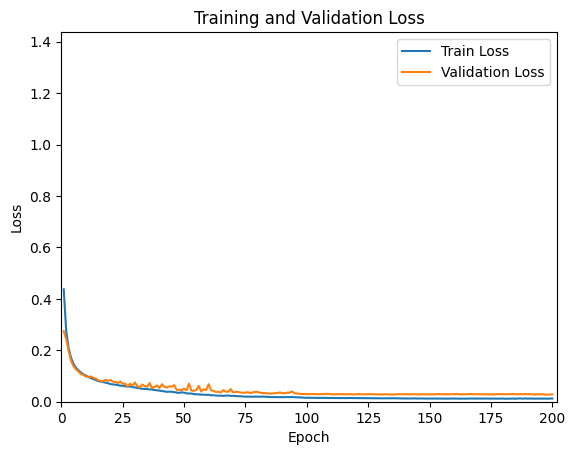

In [6]:
history = unet_model.train(drainage_dataloader, config_unet, device)

### Saving training callbacks

In [7]:
unet_model.save()
print('Saved model')
save_history_callback(unet_model, history=history, hyperparams=config_unet.get_params())
print('Saved train history')

Saved model
Saved train history
